In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as const
import astropy.units as u
plt.rcParams['font.size'] = 25


In [2]:
dataframe = pd.read_csv('run5.csv')
dataframe

,Temperature (K),B-Field (Gauss),sample I AB,sample I AD,sample I AC,sample I BD,sample I -AB,sample I -AD,sample I -AC,sample I -BD,Voltage DC,Voltage BC,Voltage BD,Voltage AC,Voltage -DC,Voltage -BC,Voltage -BD,Voltage -AC
0,96.020,-4611.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.018572,0.023846,0.076496,0.069674,-0.018687,-0.024693,-0.077875,-0.070401
1,97.290,-30.490000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.012820,0.014765,0.002175,-0.002037,-0.012945,-0.015494,-0.003359,0.001294
2,98.660,4596.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.020006,0.021451,-0.070205,-0.077554,-0.020112,-0.022190,0.069023,0.076799
3,100.215,-4611.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.019960,0.025548,0.077145,0.069712,-0.020069,-0.026403,-0.078485,-0.070425
4,101.550,-30.240000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.013915,0.016104,0.002414,-0.002261,-0.014061,-0.016846,-0.003587,0.001529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,344.600,-29.860001,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000990,0.001164,-0.000063,-0.000380,-0.001543,-0.001741,-0.000432,0.000003
164,346.150,4582.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000954,0.001133,0.000285,-0.000022,-0.001514,-0.001710,-0.000758,-0.000326
165,347.950,-4594.000000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000884,0.001021,-0.000404,-0.000673,-0.001425,-0.001614,-0.000115,0.000300
166,349.450,-29.990000,0.000075,0.000075,0.000075,0.000075,-0.000075,-0.000075,-0.000075,-0.000075,0.000782,0.000915,-0.000093,-0.000340,-0.001333,-0.001505,-0.000404,-0.000022


# Resistivity and Hall Coefficient of the Sample at Room Temperature

In [3]:
def cosh_function(x):
    return 1/np.cosh(np.log(x.value)/2.403)

In [4]:
room_temperature = 300 #K
print(np.where(np.isclose(dataframe['Temperature (K)'], 296.5, rtol = 1e-1) == True)) #Indices to check for room temperature similarities

(array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151]),)


In [5]:
(1.25 * u.mm).to('m')

<Quantity 0.00125 m>

In [6]:
index = dataframe.iloc[137]
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = index['B-Field (Gauss)'] * u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = index['Voltage BD']/index['sample I AC'] * u.Ohm 
racbd_error = np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) * u.Ohm

rbdac = index['Voltage AC']/index['sample I BD'] * u.Ohm
rbdac_error = np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2) * u.Ohm


rabdc = index['Voltage DC']/index['sample I AB'] * u.Ohm
rabdc_error = np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2) * u.Ohm

radbc = index['Voltage BC']/index['sample I AD'] * u.Ohm
radbc_error = np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) * u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

In [7]:
print("Hall coefficient at room temperature is:", np.round(rh,6), "with an error of", np.round(rh_error,6))
print("Resistivity at room temperature is:", np.round(resistivity,6), "with an error of", np.round(resistivity_error,6))

Hall coefficient at room temperature is: -0.074069 m3 / C with an error of 0.000982 m3 / C
Resistivity at room temperature is: 0.63081 m Ohm with an error of 0.001967 m Ohm


# Code for the Rest of the Stuff

In [8]:
def cosh_function(x):
    series = []
    for i in x:
        series.append(1/np.cosh(np.log(i.value)/2.403))
    return series


dataframe = dataframe
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(dataframe['B-Field (Gauss)']) * u.G




racbd = []
racbd_error = []

rbdac = []
rbdac_error = []

rabdc = []
rabdc_error = []

radbc = []
radbc_error = []

rh =[]

rh =[]
        
temperature = []
count_pos = 0

m_field = []

for count in range(0, len(magnetic_field)):
    index = dataframe.iloc[count]
    
    if magnetic_field[count].value > 40:
        
        m_field.append(index['B-Field (Gauss)'])
        temperature.append(index['Temperature (K)'])

        
        racbd.append(index['Voltage BD']/index['sample I AC']) 
        racbd_error.append(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2)) 

        rbdac.append(index['Voltage AC']/index['sample I BD'])
        rbdac_error.append(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) 


        rabdc.append(index['Voltage DC']/index['sample I AB']) 
        rabdc_error.append(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) 

        radbc.append(index['Voltage BC']/index['sample I AD']) 
        radbc_error.append(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2)) 
        
        
    elif magnetic_field[count].value <-40:
        
        m_field.append(index['B-Field (Gauss)'])
        temperature.append(index['Temperature (K)'])

        
        count_pos +=1
        racbd.append(index['Voltage -BD']/index['sample I AC']) 
        racbd_error.append(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage -BD'])**2)) 
        
        rbdac.append(index['Voltage -AC']/index['sample I BD']) 
        rbdac_error.append(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage -AC'])**2)) 


        rabdc.append(index['Voltage DC']/index['sample I AB']) 
        rabdc_error.append(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) 

        radbc.append(index['Voltage BC']/index['sample I AD']) 
        radbc_error.append(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2)) 
        
        
    
d = np.linspace(.00125, .00125, len(m_field)) * u.m
d_error = np.linspace(.00001, .00001, len(m_field)) * u.m
length = np.linspace((10 * u.mm).to('m'), (10 * u.mm).to('m'), len(m_field))
length_error = (.01 * u.mm).to('m')


racbd = np.array(racbd) * u.Ohm
racbd_error = np.array(racbd_error) * u.Ohm

rbdac = np.array(rbdac) * u.Ohm
rbdac_error = np.array(rbdac_error) * u.Ohm

rabdc = np.array(rabdc) * u.Ohm
rabdc_error = np.array(rabdc_error) * u.Ohm

radbc = np.array(radbc) * u.Ohm
radbc_error = np.array(radbc_error) * u.Ohm

m_field = np.array(m_field) * u.G
magnetic_field_error = np.linspace(-35.540001, -35.540001, len(m_field)) * u.G

                             
temperature = np.array(temperature) * u.K

trans_resistance =(racbd+rbdac)/2 


trans_resistance_error = np.sqrt(1/4*racbd_error**2 + 1/4*rbdac_error**2) 

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh = []
rh_error = []
for count in range(0, len(m_field)):
    if m_field[count]>0:
        rh.append(-(trans_resistance[count]/m_field[count] * d[count]).value)
    else:
        rh.append((trans_resistance[count]/m_field[count] * d[count]).value)

rh_error.append((np.sqrt((trans_resistance_error*d/m_field)**2 + (d_error*trans_resistance/m_field)**2 + (trans_resistance*d/(m_field**2)*magnetic_field_error)**2)).to('m^3 C^-1'))
rh = (np.array(rh) * u.m * u.Ohm / u.G).to('m^3 C^-1')


<ipython-input-8-70f722520bb0>:4: RuntimeWarning: invalid value encountered in log
  series.append(1/np.cosh(np.log(i.value)/2.403))


# Plot of Resistivity vs Inverse Temperature


In [9]:
(1/990)/((1/990)-1/450)

-0.8333333333333334

In [10]:
import scipy
def extra(x, a,c):
    return a*x+c


In [11]:
np.where(np.round(temperature,1)==270.1)

(array([], dtype=int64),)

In [12]:
np.round(temperature,1)[70:80]

<Quantity [252.6, 255.6, 257.4, 260.4, 262.2, 265.2, 267.2, 270.1, 272. ,
           275. ] K>

In [13]:
temperature[77]

<Quantity 270.1 K>

In [14]:
9.93/d[77].value

7944.0

In [15]:
resistivity[77]/d[77]

<Quantity 3325.25598124 Ohm>

In [16]:
resistivity_error[77]

<Quantity 0.0019465 m Ohm>

In [17]:
resistivity[np.where(temperature==)]

SyntaxError: invalid syntax (<ipython-input-17-dba844151b46>, line 1)

In [ ]:
(990)/((990)-420)

Text(0.5, 1.0, 'Resistivity ($\\rho$) vs Temperature (T)')

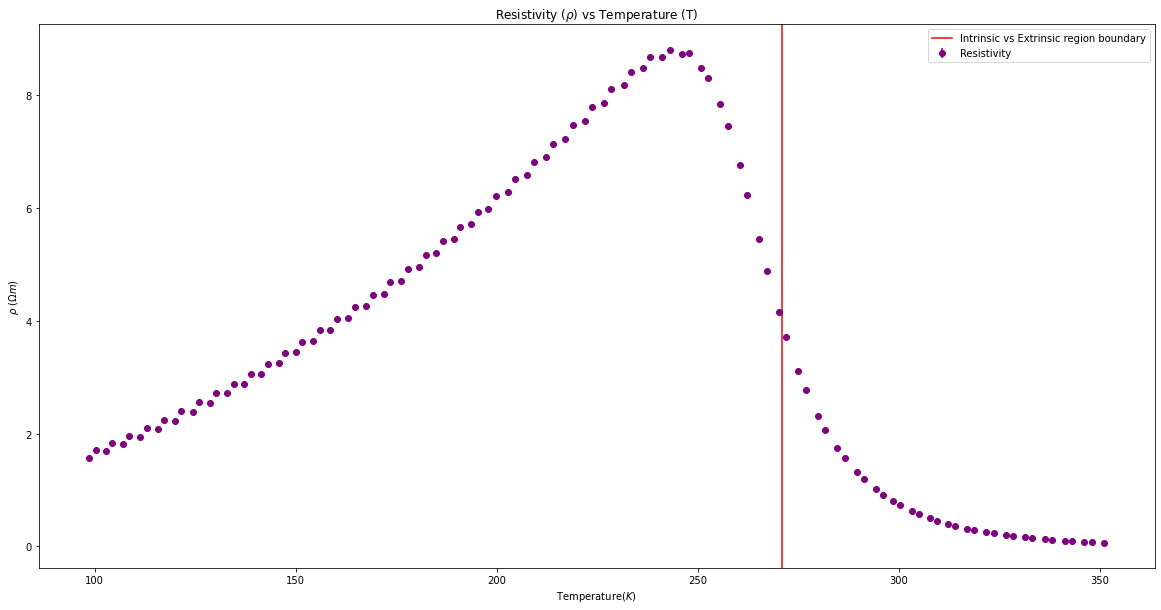

In [20]:

plt.figure(figsize=(20,10))
#plt.errorbar(1/temperature, resistivity,marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(temperature, resistivity, yerr = resistivity_error, marker='o', color = 'purple', linestyle = 'none', label = 'Resistivity')
plt.axvline(x=271, color='r', linestyle='-', label = 'Intrinsic vs Extrinsic region boundary')
plt.legend(loc='best')
#plt.errorbar(inverse_temperature, resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
#plt.legend(loc='best')
plt.ylabel(r'$\rho$ ($\Omega m$)')
plt.xlabel(r'Temperature($K$)')
plt.title(r'Resistivity ($\rho$) vs Temperature (T)')



In [21]:
new_temp = np.delete(temperature[np.where(temperature.value<250)],0)
new_resistivity = np.delete(resistivity[np.where(temperature.value<250)],0)

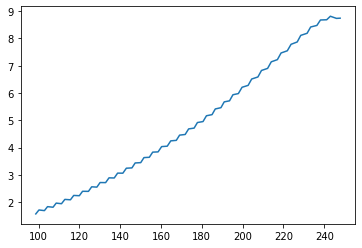

In [22]:
plt.plot(new_temp, new_resistivity)
popt, pcov = scipy.optimize.curve_fit(extra,new_temp, new_resistivity)

In [23]:
extra(271, popt[0], popt[1])

9.934767396523647

In [24]:
np.linalg.norm(pcov)

0.015585970736832933

In [25]:
(1/9)/(1/9)-(1/)

SyntaxError: invalid syntax (<ipython-input-25-f879e5e53c44>, line 1)

# Conductivity vs Inverse Temperature

Text(0.5, 1.0, 'Conductivity ($\\sigma$) vs Temperature ($T$)')

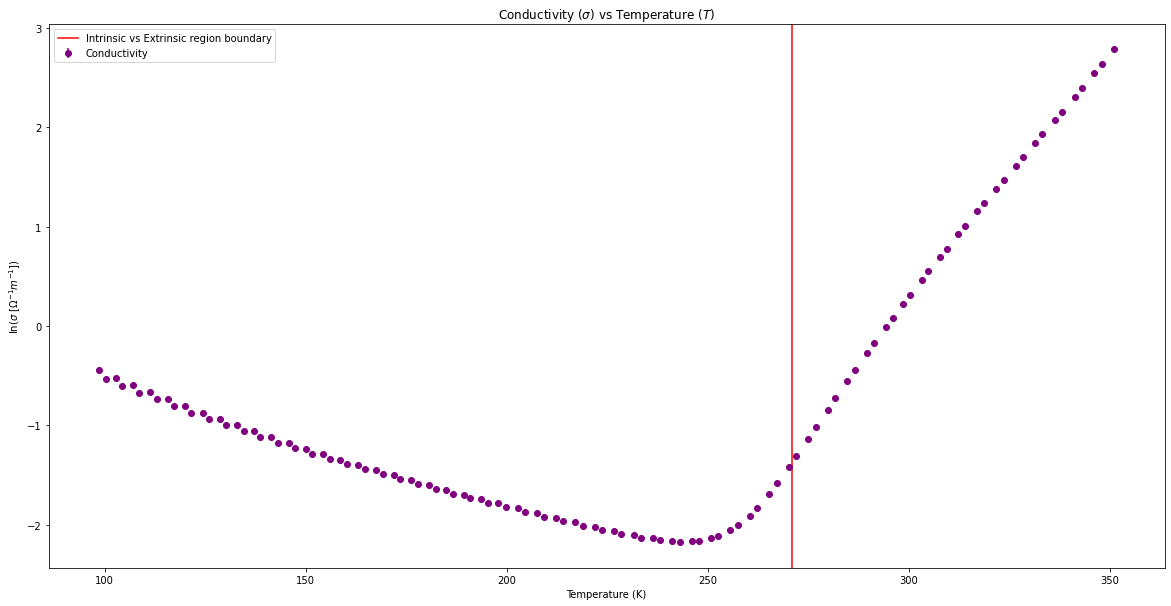

In [26]:
plt.figure(figsize=(20,10))
plt.errorbar(temperature.value, np.log(1/resistivity.value), yerr =resistivity_error.value, marker='o', linestyle = 'none', color = 'purple', label ='Conductivity')
plt.axvline(x=271, color='r', linestyle='-', label = 'Intrinsic vs Extrinsic region boundary')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'ln($\sigma$ [$\Omega^{-1} m^{-1}]$)')
plt.xlabel(r'Temperature (K)')
plt.title(r'Conductivity ($\sigma$) vs Temperature ($T$)')


In [27]:
cond = 1/resistivity.value
new_cond = cond[np.where(temperature.value<250)]
new_cond = np.delete(new_cond, 0)
new_temp = temperature[np.where(temperature.value<250)]
new_temp = np.delete(new_temp, 0)

In [28]:
conductivity_value = cond[np.where(np.round(temperature.value,1)==272)]

In [29]:
conductivity_value

array([0.26903342])

In [30]:
popt

array([ 0.05139448, -3.9931361 ])

In [31]:
new_temp.value

array([ 98.66 , 100.215, 102.885, 104.415, 107.115, 108.65 , 111.25 ,
       112.9  , 115.64 , 117.245, 119.99 , 121.58 , 124.455, 126.05 ,
       128.59 , 130.165, 132.875, 134.54 , 137.095, 138.755, 141.325,
       143.03 , 145.77 , 147.345, 150.08 , 151.675, 154.295, 155.945,
       158.575, 160.33 , 163.075, 164.8  , 167.505, 169.12 , 171.855,
       173.555, 176.235, 177.865, 180.595, 182.285, 185.015, 186.615,
       189.385, 190.985, 193.585, 195.265, 197.915, 199.73 , 202.7  ,
       204.45 , 207.5  , 209.25 , 212.25 , 214.05 , 217.05 , 218.85 ,
       221.9  , 223.75 , 226.75 , 228.5  , 231.6  , 233.35 , 236.4  ,
       238.15 , 241.2  , 243.   , 246.   , 247.8  ])

In [32]:
extra_cond = extra(new_temp.value, popt[0],popt[1])

In [33]:
extra_cond

array([1.07744309, 1.1573615 , 1.29458476, 1.37321831, 1.5119834 ,
       1.59087392, 1.72449956, 1.80930045, 1.95012132, 2.03260946,
       2.1736873 , 2.25540452, 2.40316364, 2.48513783, 2.61567981,
       2.69662611, 2.83590515, 2.92147695, 3.05278984, 3.13810468,
       3.27018848, 3.35781607, 3.49863694, 3.57958324, 3.72014714,
       3.80212133, 3.93677486, 4.02157575, 4.15674323, 4.24694053,
       4.38801838, 4.47667385, 4.61569591, 4.69869799, 4.83926189,
       4.9266325 , 5.0643697 , 5.1481427 , 5.28844963, 5.3753063 ,
       5.51561322, 5.59784438, 5.74020709, 5.82243825, 5.9560639 ,
       6.04240662, 6.17860198, 6.27188296, 6.42452456, 6.5144649 ,
       6.67121805, 6.76115839, 6.91534182, 7.00785188, 7.16203532,
       7.25454538, 7.41129853, 7.50637832, 7.66056175, 7.75050209,
       7.90982497, 7.99976531, 8.15651846, 8.2464588 , 8.40321196,
       8.49572202, 8.64990545, 8.74241551])

In [34]:
1/0.03

33.333333333333336

In [35]:
1/.269

3.717472118959108

In [36]:
33/30

1.1

Text(0.5, 1.0, 'Conductivity ($\\sigma$) vs Temperature ($T$)')

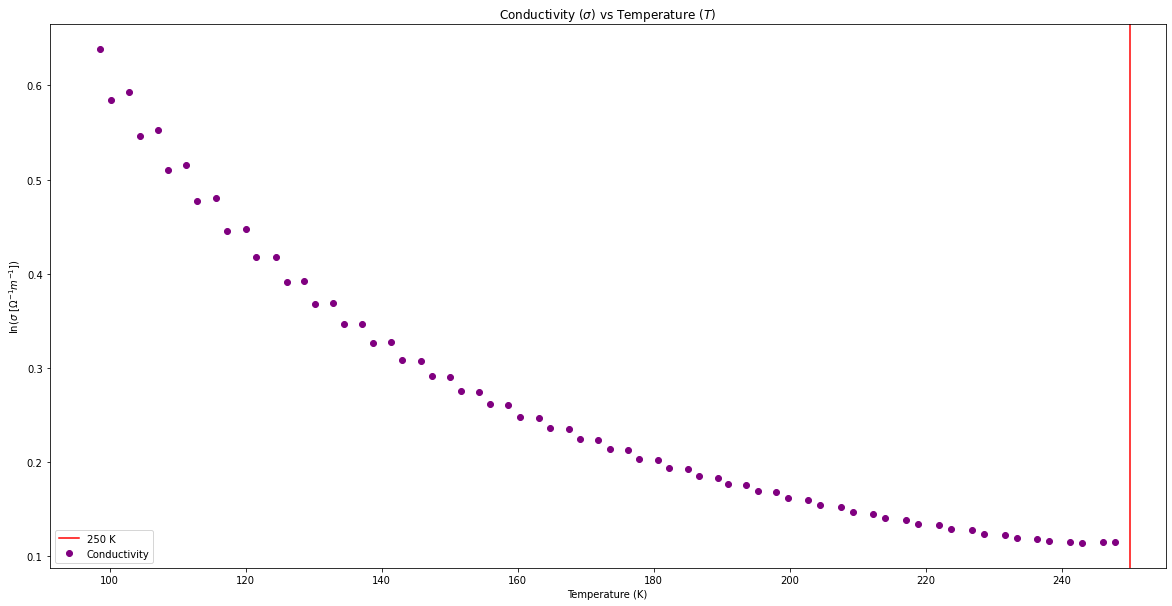

In [37]:
plt.figure(figsize=(20,10))
plt.errorbar(new_temp, new_cond, marker='o', linestyle = 'none', color = 'purple', label ='Conductivity')
plt.axvline(x=250, color='r', linestyle='-', label = '250 K')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'ln($\sigma$ [$\Omega^{-1} m^{-1}]$)')
plt.xlabel(r'Temperature (K)')
plt.title(r'Conductivity ($\sigma$) vs Temperature ($T$)')


Text(0.5, 1.0, 'Conductivity ($\\sigma$) vs Temperature ($T$)')

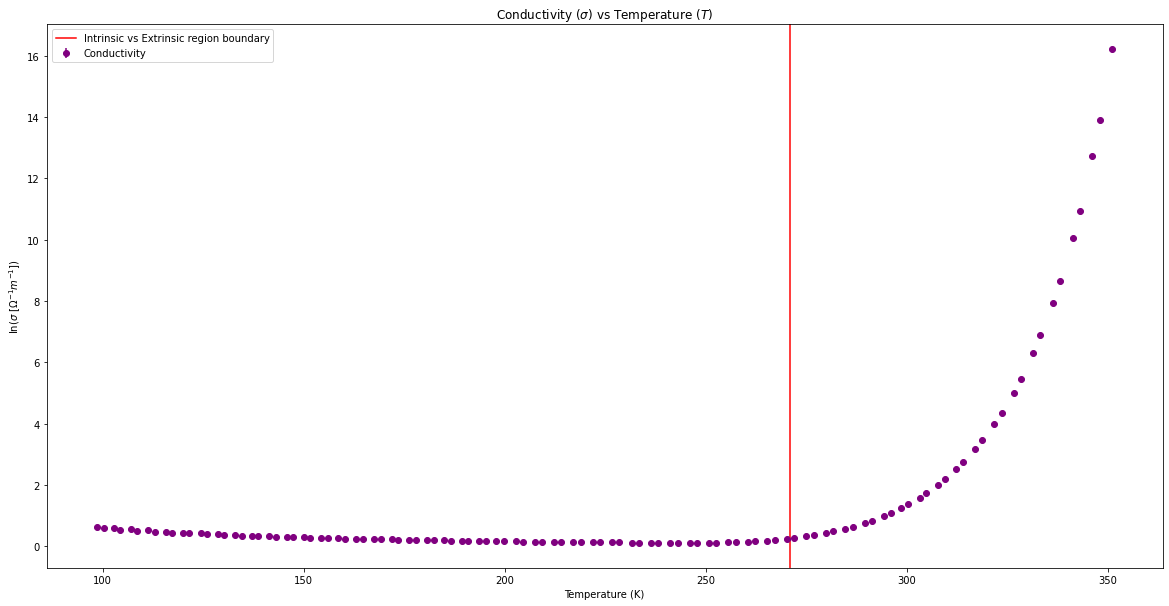

In [38]:
plt.figure(figsize=(20,10))
plt.errorbar(temperature.value, (1/resistivity.value), yerr =resistivity_error.value, marker='o', linestyle = 'none', color = 'purple', label ='Conductivity')
plt.axvline(x=271, color='r', linestyle='-', label = 'Intrinsic vs Extrinsic region boundary')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'ln($\sigma$ [$\Omega^{-1} m^{-1}]$)')
plt.xlabel(r'Temperature (K)')
plt.title(r'Conductivity ($\sigma$) vs Temperature ($T$)')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Conductivity vs Inverse Temperature')

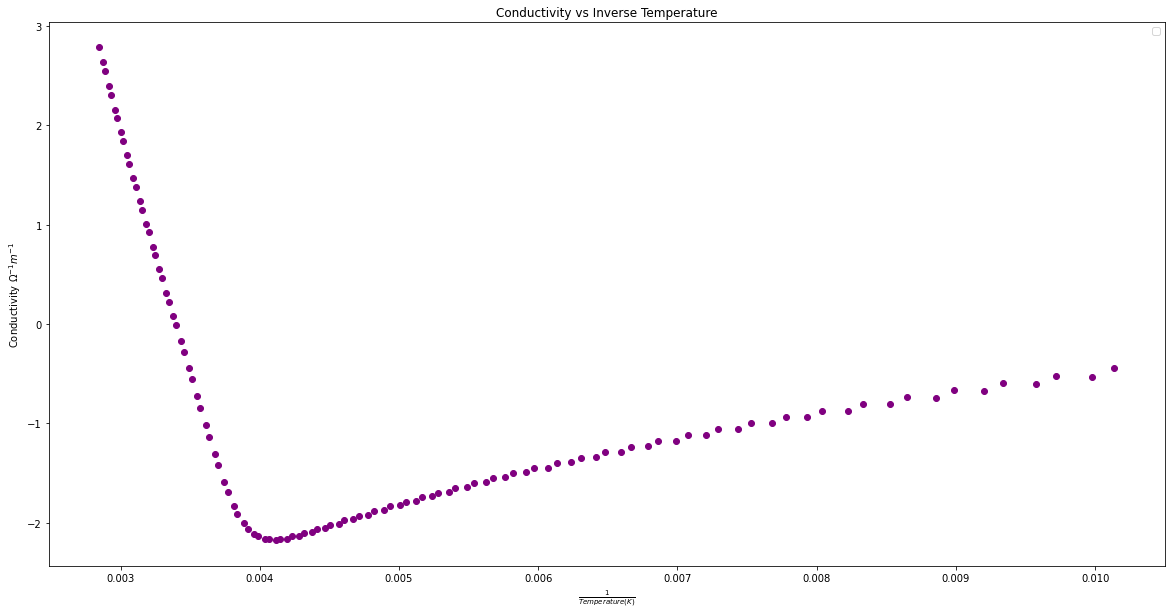

In [39]:
plt.figure(figsize=(20,10))
plt.errorbar(1/temperature.value, np.log(1/resistivity.value), yerr =resistivity_error.value, marker='o', linestyle = 'none', color = 'purple')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'Conductivity $\Omega^{-1} m^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Conductivity vs Inverse Temperature')

# Hall Coefficienct vs Inverse Temperature


Text(0.5, 1.0, 'Hall Coefficient vs Inverse Temperature')

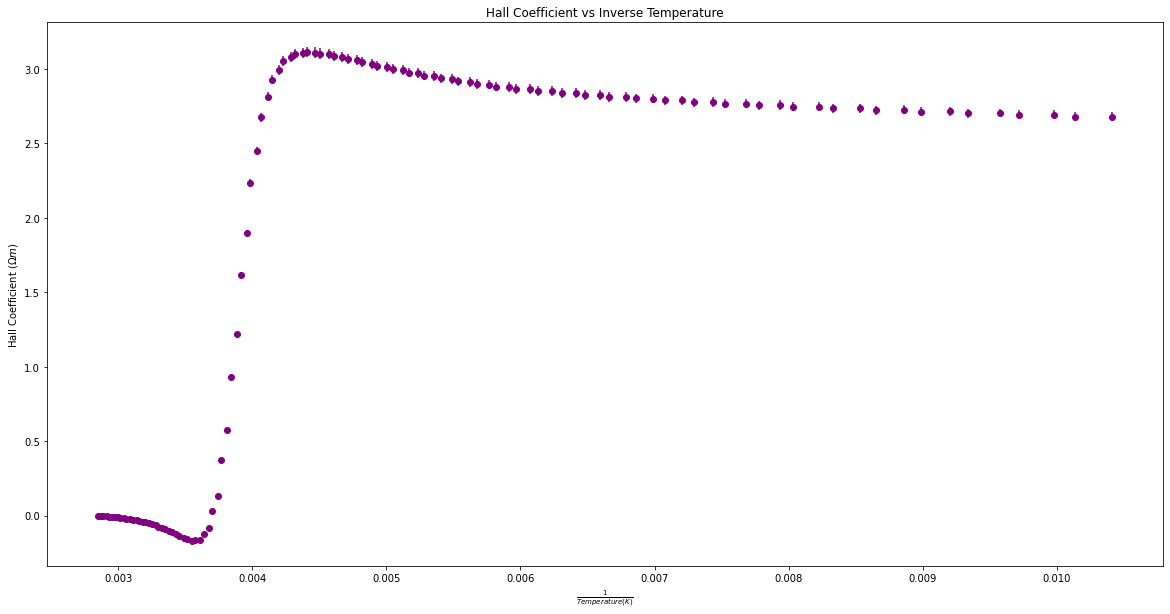

In [40]:

plt.figure(figsize=(20,10))
#plt.errorbar(1/temperature, resistivity,marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/temperature, rh, rh_error, marker='o', color = 'purple', linestyle = 'none')

#plt.errorbar(inverse_temperature, resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
#plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient ($\Omega m$)')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Coefficient vs Inverse Temperature')



# Plot (Hall coefficient X conductivity) versus T. Where does Hall coefficient becomes zero

In [41]:
conductivity = 1/resistivity
temp = resistivity_error
conductivity_error = np.sqrt((-conductivity**2*temp)**2)
rhcon = rh * conductivity
rhcon_error = np.sqrt((rhcon*conductivity)**2 + (conductivity_error*rhcon)**2)

max_index = np.where(rhcon_error==np.max(rhcon_error))
rhcon = np.delete(rhcon, max_index)
rhcon_error = np.delete(rhcon_error, max_index)
correct_temp = np.delete(np.array(temperature), max_index)



Text(0.5, 1.0, 'Hall Mobility ($\\mu_H$) vs Temperature(T)')

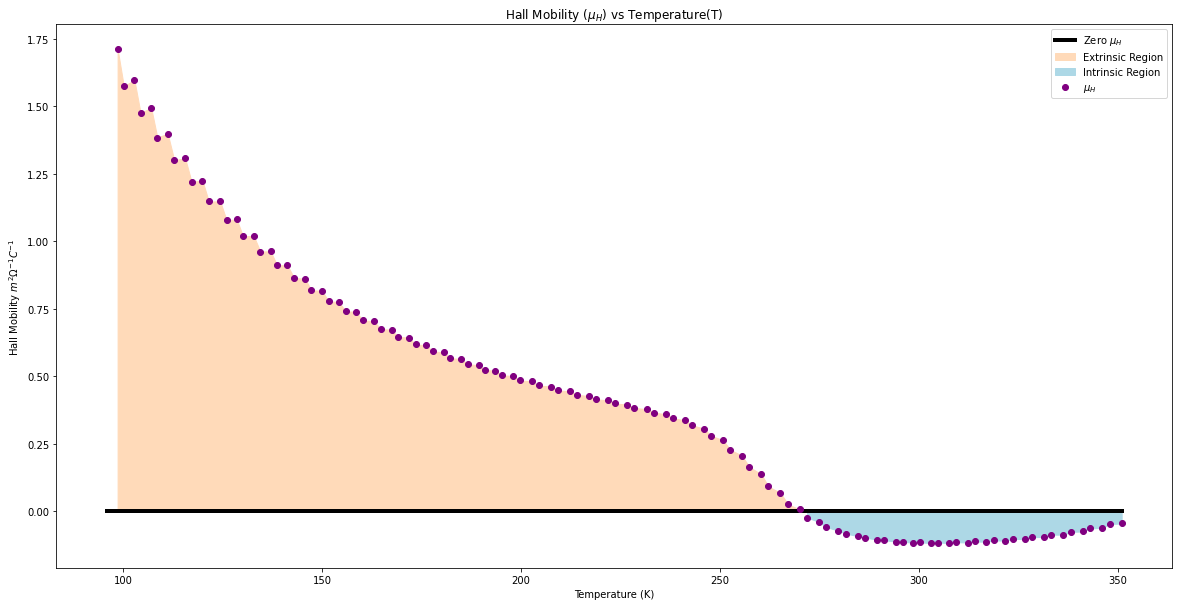

In [86]:
plt.figure(figsize=(20,10))
plt.errorbar(correct_temp, ((rhcon.value)), marker='o', linestyle = 'none', color = 'purple', label = r'$\mu_H$')
#plt.errorbar(correct_temp, 1.75*np.log(np.abs(rhcon.value)), marker='o', linestyle = 'none', color = 'purple', label = r'$\mu_H$')
plt.plot(temperature, np.zeros(len(temperature)),  linewidth = 4, label = r'Zero $\mu_H$', color = 'k')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rhcon.value, rhcon.value>np.zeros(len(temperature)), color='peachpuff',label = 'Extrinsic Region')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rhcon.value, rhcon.value<np.zeros(len(temperature)), color='lightblue',label = 'Intrinsic Region')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel('Temperature (K)')
plt.title(r'Hall Mobility ($\mu_H$) vs Temperature(T)')

In [125]:
def function_fitting(a, x):
    return a*x

In [145]:
new_rhcon_test = rhcon.to('cm^2 V^-1 s^-1')

In [146]:
correct_temp_new = np.delete(correct_temp[np.where(correct_temp<250)],0)
new_rhcon_test = np.delete(new_rhcon_test[np.where(correct_temp<250)],0)

Text(0.5, 1.0, 'Hall Mobility ($\\mu_H$) vs Temperature(T)')

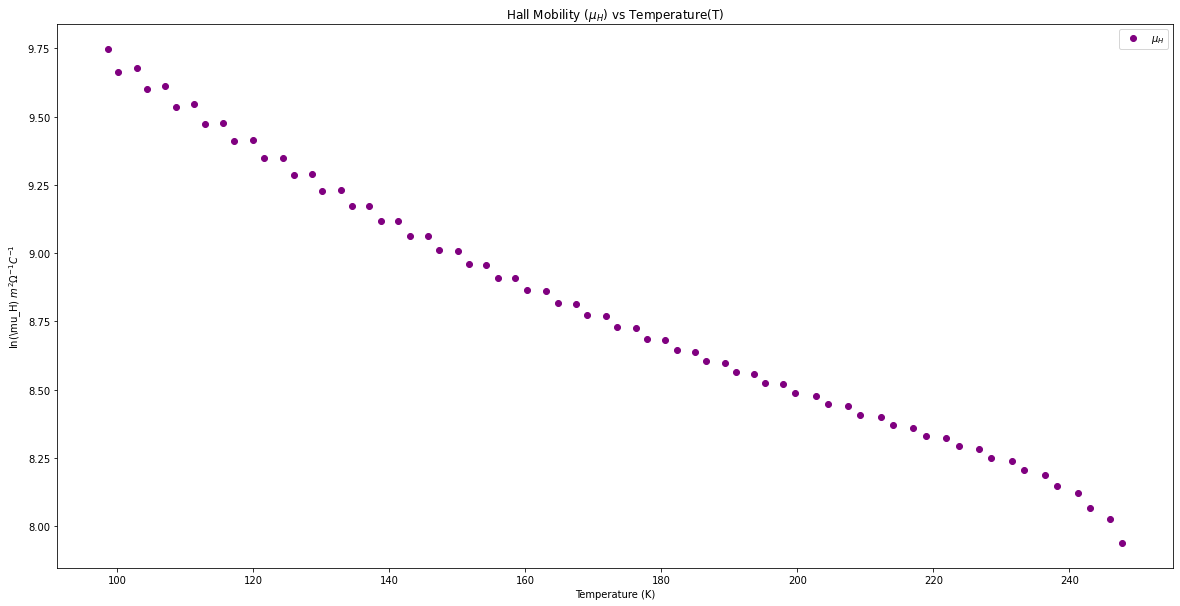

In [150]:
plt.figure(figsize=(20,10))
plt.errorbar((correct_temp_new), np.log(new_rhcon_test.value), marker='o', linestyle = 'none', color = 'purple', label = r'$\mu_H$')
#plt.errorbar(correct_temp, 1.75*np.log(np.abs(rhcon.value)), marker='o', linestyle = 'none', color = 'purple', label = r'$\mu_H$')
#plt.plot(correct_temp_new, np.zeros(len(correct_temp_new)),  linewidth = 4, label = r'Zero $\mu_H$', color = 'k')
#plt.plot(correct_temp_new, (correct_temp_new-95)**(-3/2))
#plt.fill_between(temperature.value, np.zeros(len(temperature)), rhcon.value, rhcon.value>np.zeros(len(temperature)), color='peachpuff',label = 'Extrinsic Region')
#plt.fill_between(temperature.value, np.zeros(len(temperature)), rhcon.value, rhcon.value<np.zeros(len(temperature)), color='lightblue',label = 'Intrinsic Region')
#plt.xlim(100, 270)
plt.legend(loc='best')
plt.ylabel(r'ln(\mu_H) $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel('Temperature (K)')
plt.title(r'Hall Mobility ($\mu_H$) vs Temperature(T)')

In [154]:
popt, pcov = scipy.optimize.curve_fit(function_fitting,np.log(correct_temp_new), np.log(new_rhcon_test.value))

In [155]:
popt

array([1.71593079])

In [156]:
pcov

array([[0.0004941]])

In [ ]:
1.

In [142]:
popt[0]*10000

36.516612824876894

In [ ]:
popt[0]

In [43]:
new_temp_test = correct_temp[np.where(rhcon>0)]

In [44]:
rhcon_new = rhcon[np.where(rhcon>0)]

In [45]:
(1/0.03)/((1/0.03)-(1/.269))

1.1255230125523012

In [46]:
import scipy
def extra(x, a,c):
    return a*x+c
popt, pcov = scipy.optimize.curve_fit(extra,new_temp_test, np.log(rhcon_new.value))

In [47]:
popt

array([-0.01506082,  2.10449527])

In [48]:
3/200

0.015

In [49]:
extra(new_temp_test, popt[0], popt[1])

array([ 0.61859434,  0.59517476,  0.55496235,  0.53191929,  0.49125507,
        0.4681367 ,  0.42897856,  0.4041282 ,  0.36286154,  0.33868892,
        0.29734695,  0.27340024,  0.23010037,  0.20607836,  0.16782386,
        0.14410306,  0.10328823,  0.07821196,  0.03973155,  0.01473058,
       -0.02397574, -0.04965444, -0.0909211 , -0.1146419 , -0.15583325,
       -0.17985527, -0.21931463, -0.24416499, -0.28377496, -0.3102067 ,
       -0.35154867, -0.37752859, -0.41826812, -0.44259135, -0.48378271,
       -0.50938611, -0.54974912, -0.57429826, -0.61541431, -0.64086711,
       -0.68198316, -0.70608047, -0.74779896, -0.77189628, -0.81105442,
       -0.83635661, -0.87626779, -0.90360319, -0.94833384, -0.97469028,
       -1.02062579, -1.04698224, -1.09216471, -1.11927419, -1.16445667,
       -1.19156615, -1.23750166, -1.26536419, -1.31054666, -1.33690311,
       -1.38359166, -1.4099481 , -1.45588362, -1.48224006, -1.52817558,
       -1.55528506, -1.60046753, -1.62757702, -1.67351253, -1.70

In [50]:
(10* u.Ohm**-1 * u.C **-1 * u.m**2).to('m^2 V^-1 s^-1')

<Quantity 10. m2 / (s V)>

Text(0.5, 1.0, 'Carrier Mobility vs Temperature')

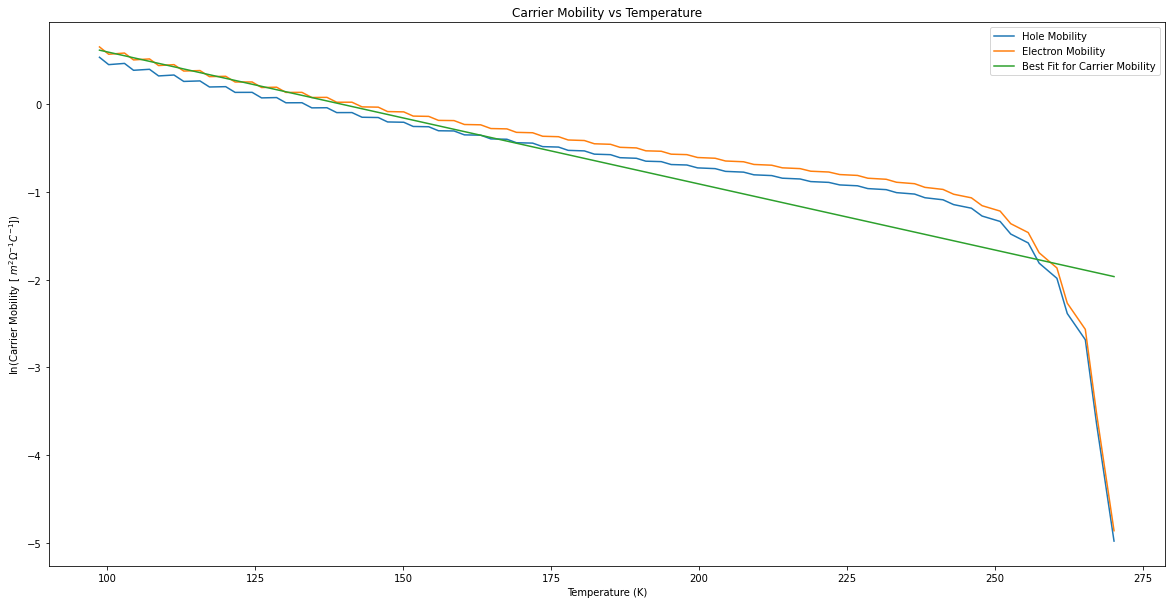

In [51]:
plt.figure(figsize=(20,10))
plt.plot((new_temp_test), np.log(rhcon_new.value), label = 'Hole Mobility')
plt.plot((new_temp_test),np.log(1.1255230125523012*rhcon_new.value), label = 'Electron Mobility')
plt.plot(new_temp_test, extra(new_temp_test, popt[0], popt[1]), label = 'Best Fit for Carrier Mobility')
#plt.gca().invert_xaxis()
plt.legend(loc='best')
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Carrier Mobility [ $m^2 \Omega^{-1} C^{-1}$])')
plt.title('Carrier Mobility vs Temperature')

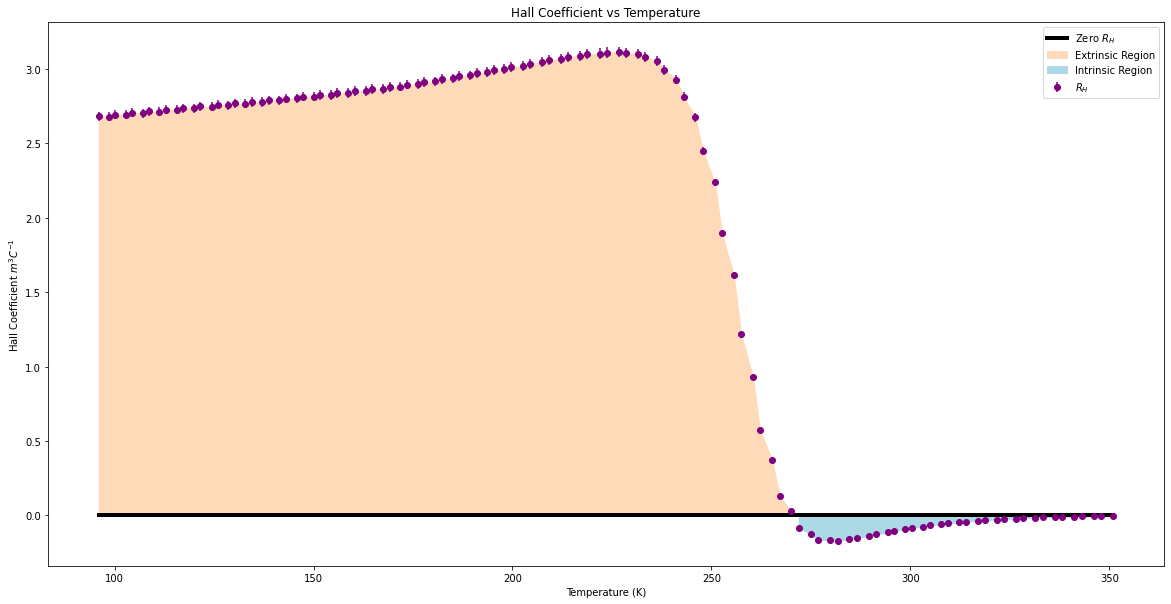

In [58]:
plt.figure(figsize=(20,10))
plt.errorbar(temperature, rh, yerr =rh_error, marker='o', linestyle = 'none', color = 'purple', label = r'$R_H$')
plt.plot(temperature, np.zeros(len(temperature)),  linewidth = 4, label = r'Zero $R_H$', color = 'k')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Coefficient vs Temperature')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rh.value, rh.value>np.zeros(len(temperature)), color='peachpuff',label = 'Extrinsic Region')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rh.value, rh.value<np.zeros(len(temperature)), color='lightblue',label = 'Intrinsic Region')

plt.legend(loc='best')

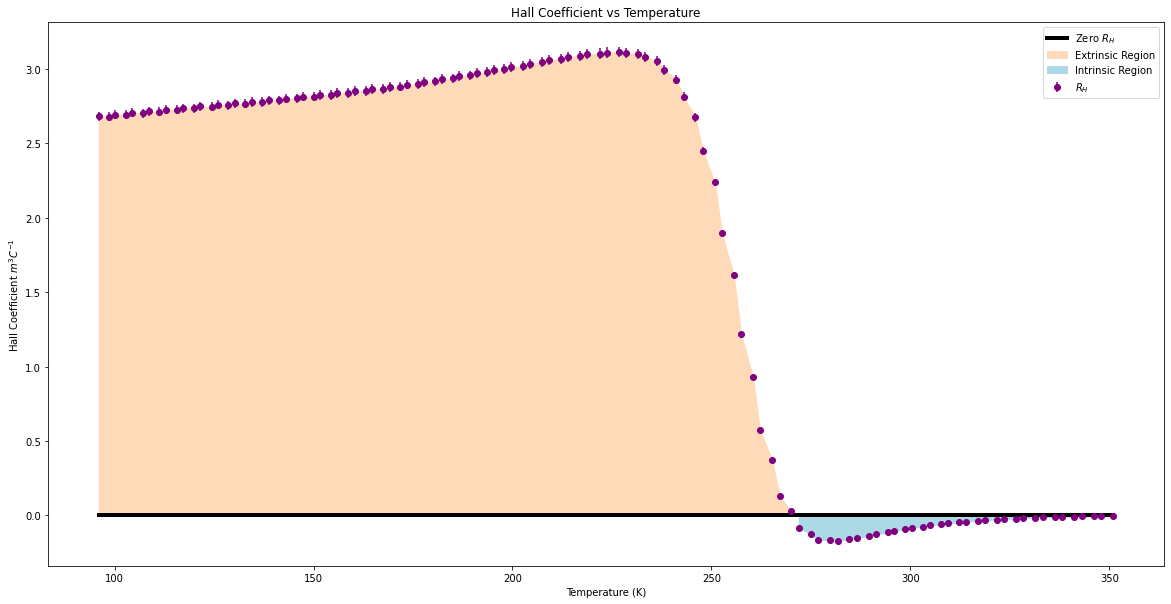

In [59]:
plt.figure(figsize=(20,10))
plt.errorbar(temperature, rh, yerr =rh_error, marker='o', linestyle = 'none', color = 'purple', label = r'$R_H$')
plt.plot(temperature, np.zeros(len(temperature)),  linewidth = 4, label = r'Zero $R_H$', color = 'k')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Coefficient vs Temperature')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rh.value, rh.value>np.zeros(len(temperature)), color='peachpuff',label = 'Extrinsic Region')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rh.value, rh.value<np.zeros(len(temperature)), color='lightblue',label = 'Intrinsic Region')

plt.legend(loc='best')

# Explain what type of material we have: p-type or n-type. (Why don’t you need to know the direction of the magnetic field after all?)

# Find electron or hole concentrations for the sample versus temperature.

Text(0, 0.5, 'Concentration')

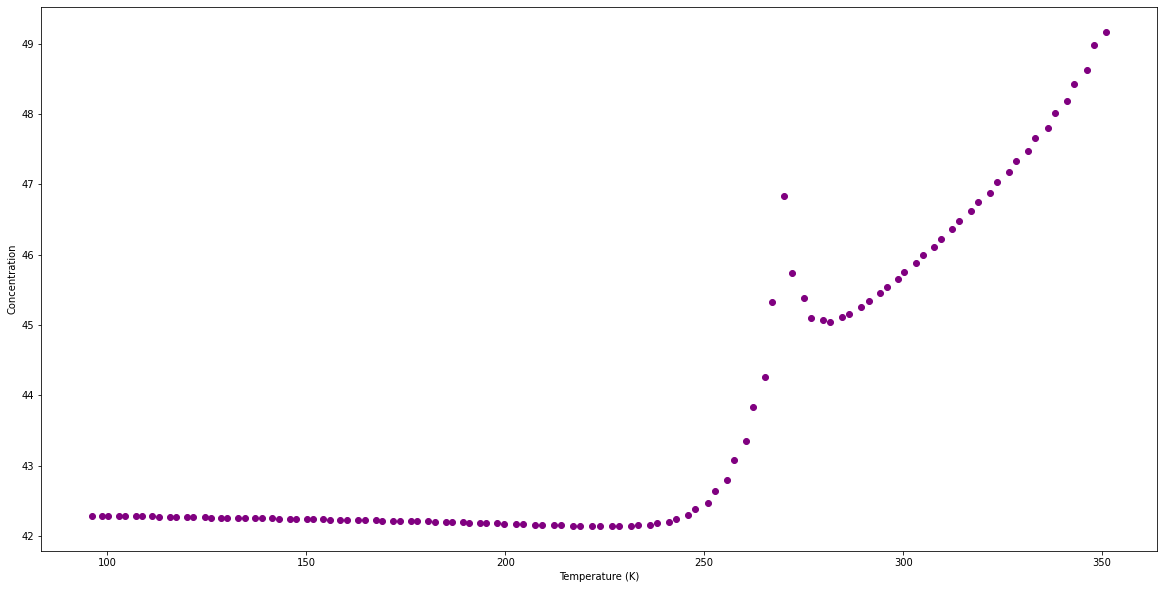

In [60]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.scatter(temperature, np.log(np.abs(concentration.value)), color = 'purple')
plt.xlabel('Temperature (K)')
plt.ylabel('Concentration')

# Find the Hall Coefficient RH and Hall mobility

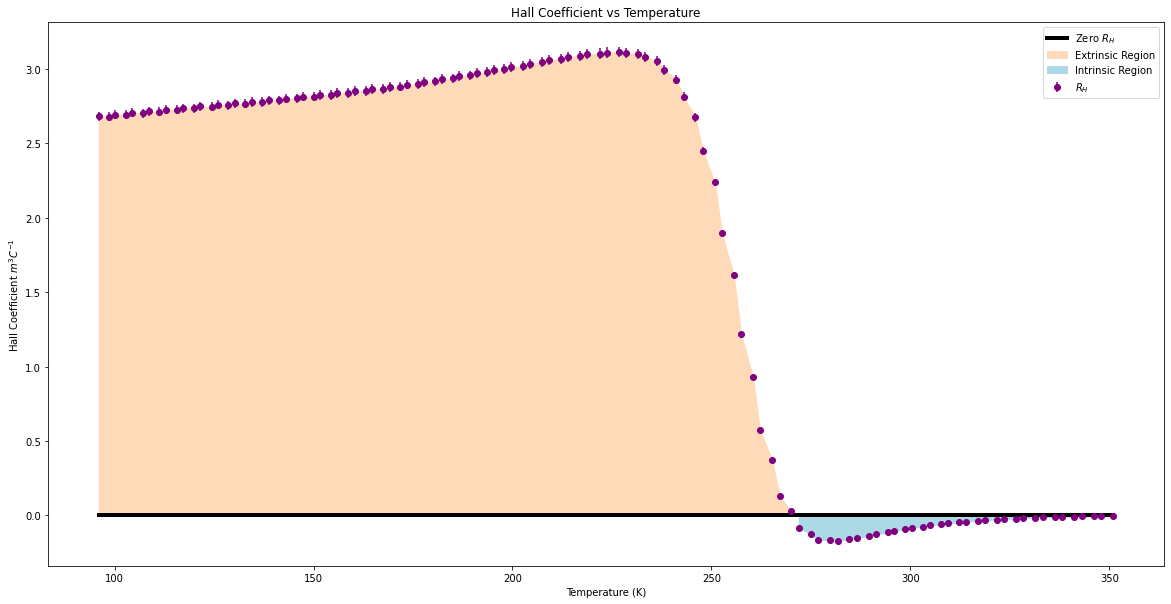

In [61]:
plt.figure(figsize=(20,10))
plt.errorbar(temperature, rh, yerr =rh_error, marker='o', linestyle = 'none', color = 'purple', label = r'$R_H$')
plt.plot(temperature, np.zeros(len(temperature)),  linewidth = 4, label = r'Zero $R_H$', color = 'k')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Coefficient vs Temperature')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rh.value, rh.value>np.zeros(len(temperature)), color='peachpuff',label = 'Extrinsic Region')
plt.fill_between(temperature.value, np.zeros(len(temperature)), rh.value, rh.value<np.zeros(len(temperature)), color='lightblue',label = 'Intrinsic Region')

plt.legend(loc='best')

In [62]:
(temperature[78]+temperature[77])/2

<Quantity 271.025 K>

In [63]:
np.where(rh<0)

(array([ 78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),)

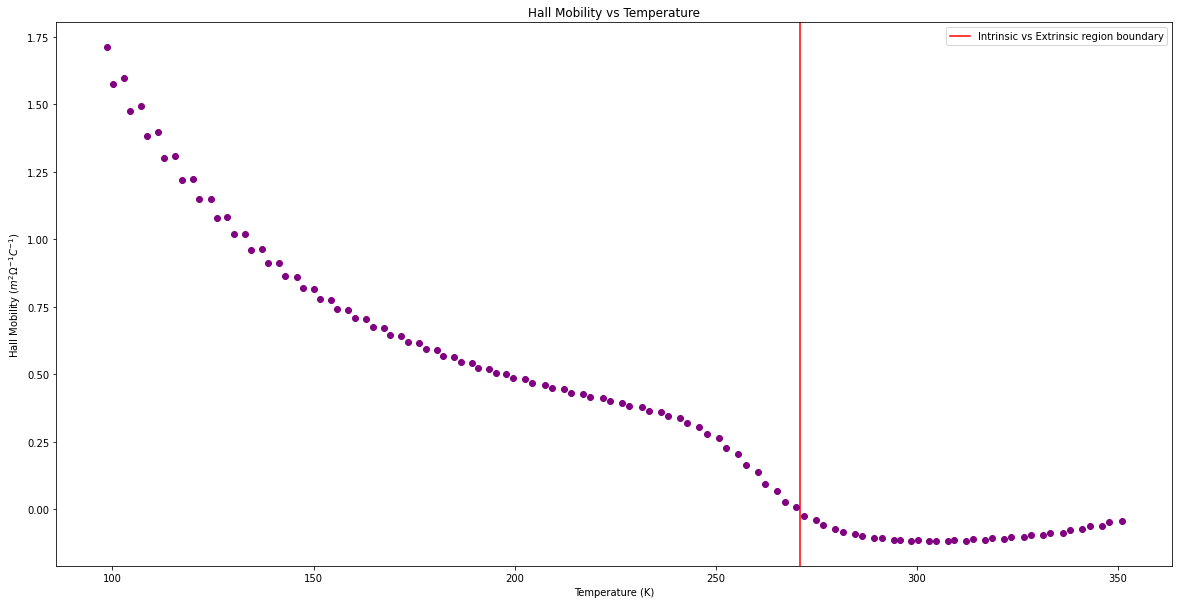

In [64]:
plt.figure(figsize=(20,10))
plt.errorbar((correct_temp), (rhcon.value), marker='o', linestyle = 'none', color = 'purple')
plt.axvline(x=271, color='r', linestyle='-', label = 'Intrinsic vs Extrinsic region boundary')

plt.ylabel(r'Hall Mobility ($m^2 \Omega^{-1} C^{-1}$)')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')
plt.legend(loc='best')

# Find electron or hole concentration in the extrinsic region see E. Haller Article.


In [65]:
indices = np.where(rh<0)
indices_2 = np.where(rh>0)

In [66]:
concentration = 1/(rh*const.e.value * u.C)

In [67]:
concentration

<Quantity [ 2.32912957e+18,  2.32968195e+18,  2.31922243e+18,
            2.31903315e+18,  2.30869613e+18,  2.31006217e+18,
            2.29949131e+18,  2.30187151e+18,  2.28966108e+18,
            2.29205529e+18,  2.28127781e+18,  2.28304390e+18,
            2.27216898e+18,  2.27361503e+18,  2.26372263e+18,
            2.26567518e+18,  2.25580487e+18,  2.25672388e+18,
            2.24729066e+18,  2.24824372e+18,  2.23848515e+18,
            2.23926321e+18,  2.22894032e+18,  2.22837285e+18,
            2.21972118e+18,  2.21996307e+18,  2.21028037e+18,
            2.21083615e+18,  2.20017029e+18,  2.19986275e+18,
            2.18955652e+18,  2.18918682e+18,  2.17913343e+18,
            2.17827144e+18,  2.16865897e+18,  2.16690163e+18,
            2.15698108e+18,  2.15441792e+18,  2.14354684e+18,
            2.14120927e+18,  2.13048187e+18,  2.12654466e+18,
            2.11594128e+18,  2.11228195e+18,  2.10154411e+18,
            2.09780165e+18,  2.08725171e+18,  2.08320069e+18,
        

In [68]:
negative_conc = concentration[indices]

In [69]:
negative_conc

<Quantity [-7.34220008e+19, -5.12467806e+19, -3.85382894e+19,
           -3.77775368e+19, -3.66992589e+19, -3.91079197e+19,
           -4.10516861e+19, -4.52441125e+19, -4.90979243e+19,
           -5.51285687e+19, -6.03132264e+19, -6.73682802e+19,
           -7.45089436e+19, -8.42661183e+19, -9.38600432e+19,
           -1.06005787e+20, -1.19287654e+20, -1.35836182e+20,
           -1.53770977e+20, -1.75469442e+20, -2.00674525e+20,
           -2.29277883e+20, -2.65021416e+20, -3.05392289e+20,
           -3.57153739e+20, -4.14923389e+20, -4.97336431e+20,
           -5.75038765e+20, -7.11353964e+20, -8.41754071e+20,
           -1.07582623e+21, -1.30537518e+21, -1.85789369e+21,
           -2.25038121e+21] 1 / m3>

Text(0.5, 1.0, 'Charge Carrier Concentration (q) vs Temperature (T)')

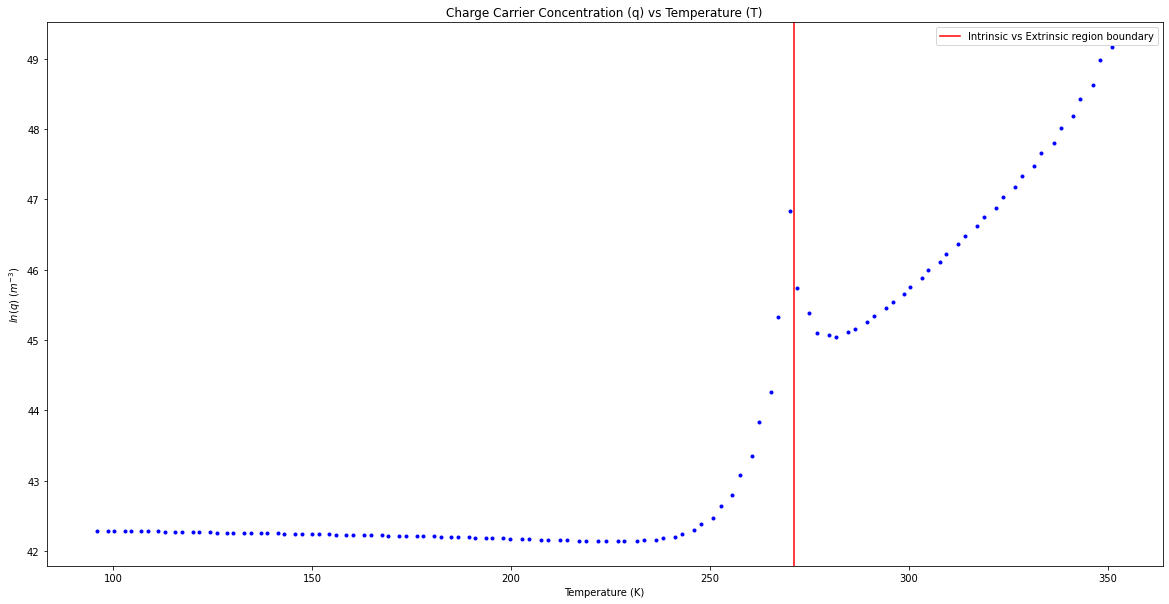

In [70]:
plt.figure(figsize=(20,10))
negative_conc = concentration[indices]
positive_conc = concentration[indices_2]
plt.plot(temperature[indices], np.log(np.abs(negative_conc.value)), '.', color = 'blue')
plt.plot(temperature[indices_2], np.log(np.abs(positive_conc.value)), '.', color ='blue')
plt.axvline(x=271, color='r', linestyle='-', label = 'Intrinsic vs Extrinsic region boundary')
plt.legend(loc='best')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$ln (q)$ ($m^{-3}$)')
plt.title('Charge Carrier Concentration (q) vs Temperature (T)')

Text(0.5, 1.0, 'Charge Carrier Concentration (q) vs Temperature (T)')

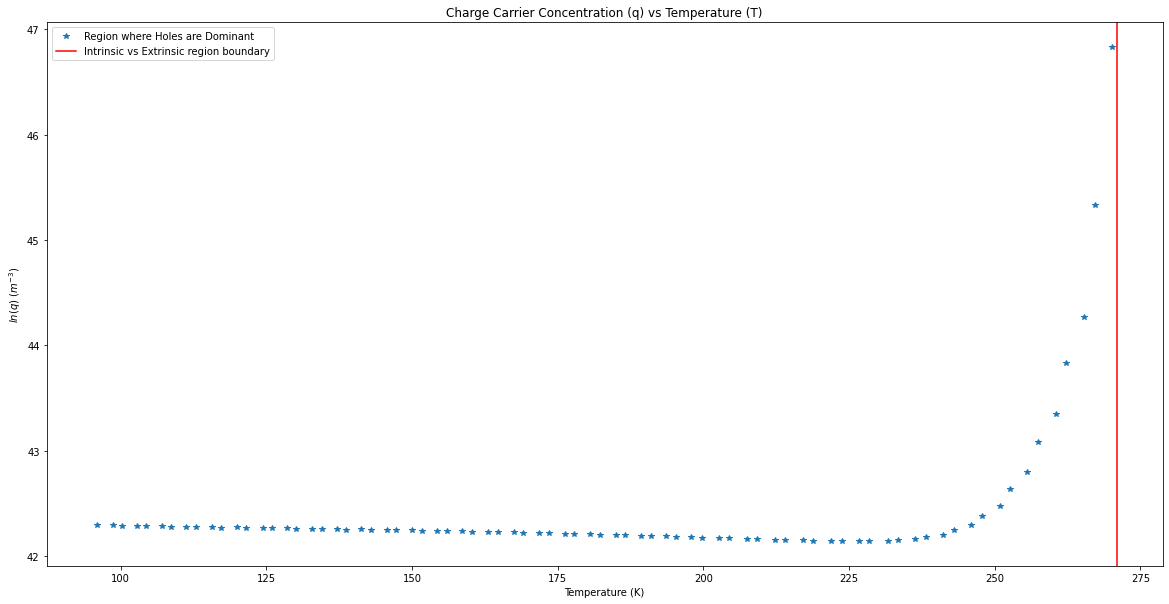

In [71]:
plt.figure(figsize=(20,10))
negative_conc = concentration[indices]
positive_conc = concentration[indices_2]
#plt.plot(temperature[indices], np.log(np.abs(negative_conc.value)), '.', label = "Region where Electrons are Dominants")
plt.plot(temperature[indices_2], np.log(np.abs(positive_conc.value)), '*', label = "Region where Holes are Dominant")
plt.axvline(x=271, color='r', linestyle='-', label = 'Intrinsic vs Extrinsic region boundary')

plt.legend(loc='best')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$ln (q)$ ($m^{-3}$)')
plt.title('Charge Carrier Concentration (q) vs Temperature (T)')

Text(0, 0.5, 'ln(Concentration)')

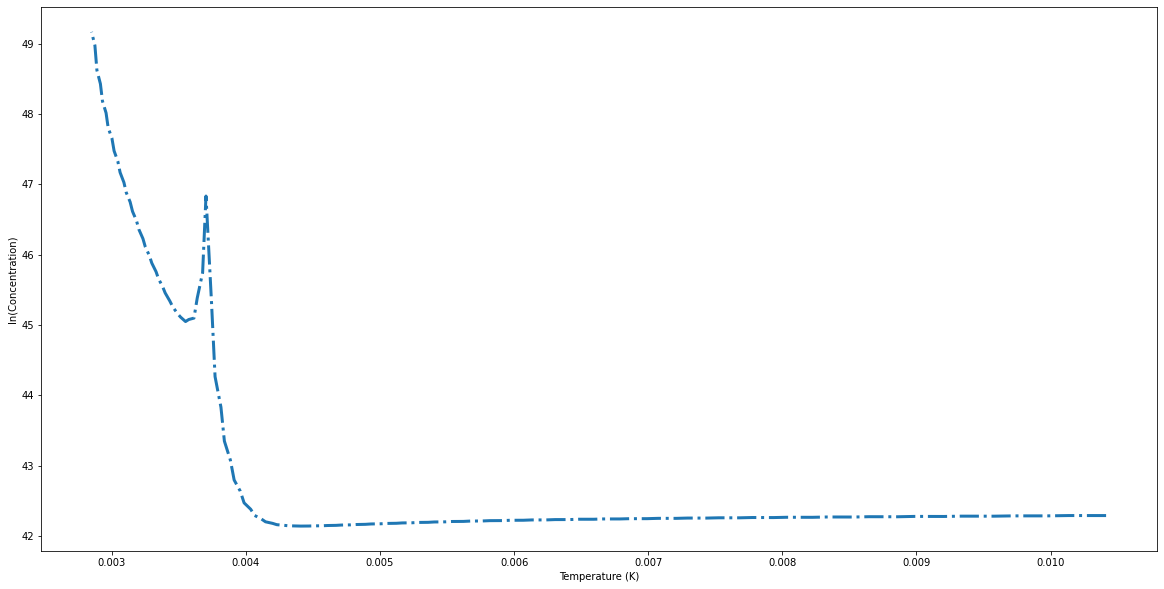

In [72]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(1/temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
#plt.xlim(95, 250)
#plt.ylim(42.1, 42.250)


(42.1, 42.25)

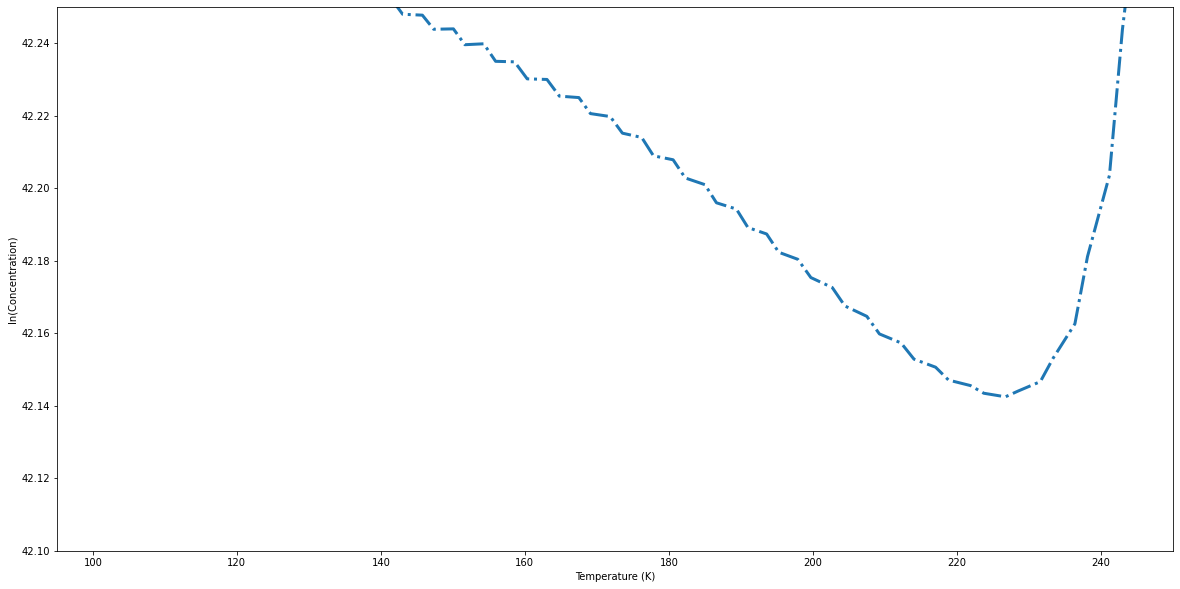

In [73]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(95, 250)
plt.ylim(42.1, 42.250)


(41.0, 43.0)

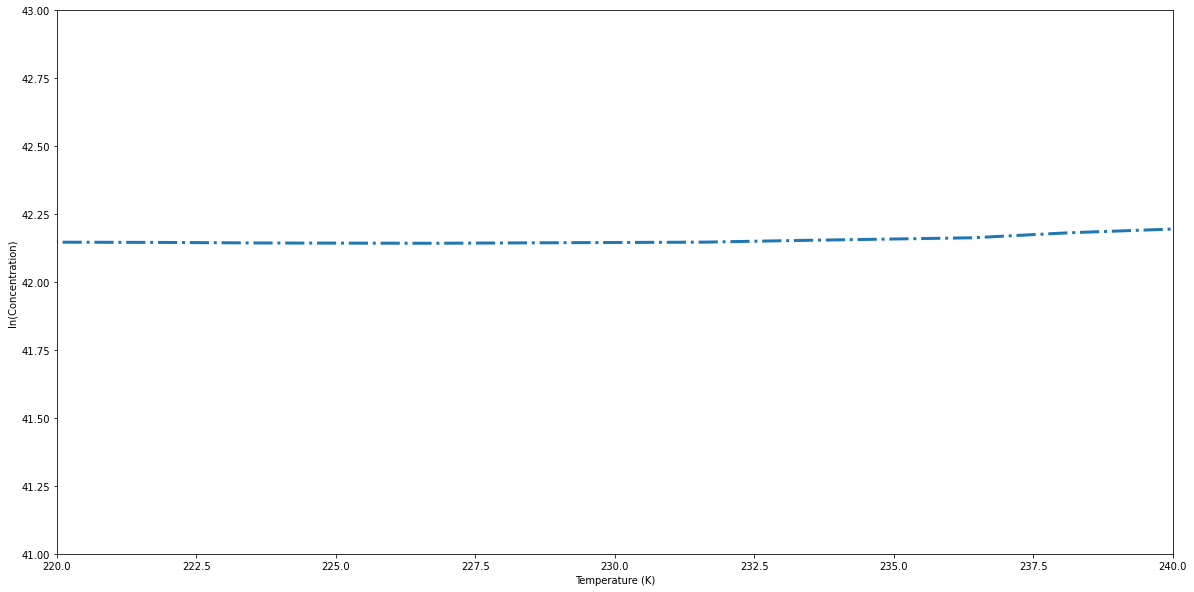

In [74]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(220, 240)
plt.ylim(41, 43)


# Find electron and hole mobilities in the extrinsic region.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.3, 0.5)

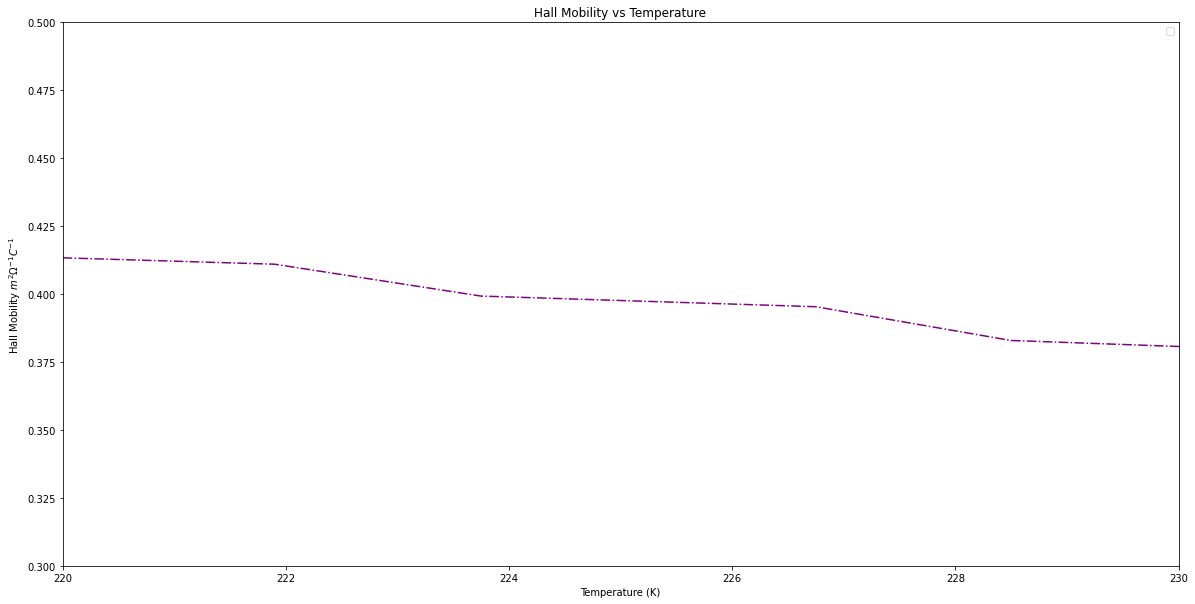

In [75]:
plt.figure(figsize=(20,10))
plt.plot(correct_temp, rhcon.value, '-.', color = 'purple')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')
plt.xlim(220, 230)
plt.ylim(0.3,.5)

# Compare the resistance measured for the sample (at zero field) with the magnetoresistance (the resistance measured while the magnetic field is on).


In [76]:
dataframe_pos = dataframe[dataframe['B-Field (Gauss)']>40]
dataframe_neg = dataframe[dataframe['B-Field (Gauss)']<-40]
dataframe_zero = dataframe[dataframe['B-Field (Gauss)']>-40]
dataframe_zero = dataframe_zero[dataframe_zero['B-Field (Gauss)']<40]

In [77]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
        else: 
            series.append(1/np.cosh(np.log(np.abs(i.value))/2.403))

    return series

index = dataframe_pos
tpos = index['Temperature (K)']
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm

trans_resistance_pos = (racbd+rbdac)/2


index = dataframe_zero
tzero = index['Temperature (K)']
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm

trans_resistance_zero = (racbd+rbdac)/2



Text(0.5, 1.0, 'Resistance at Different B-Fields')

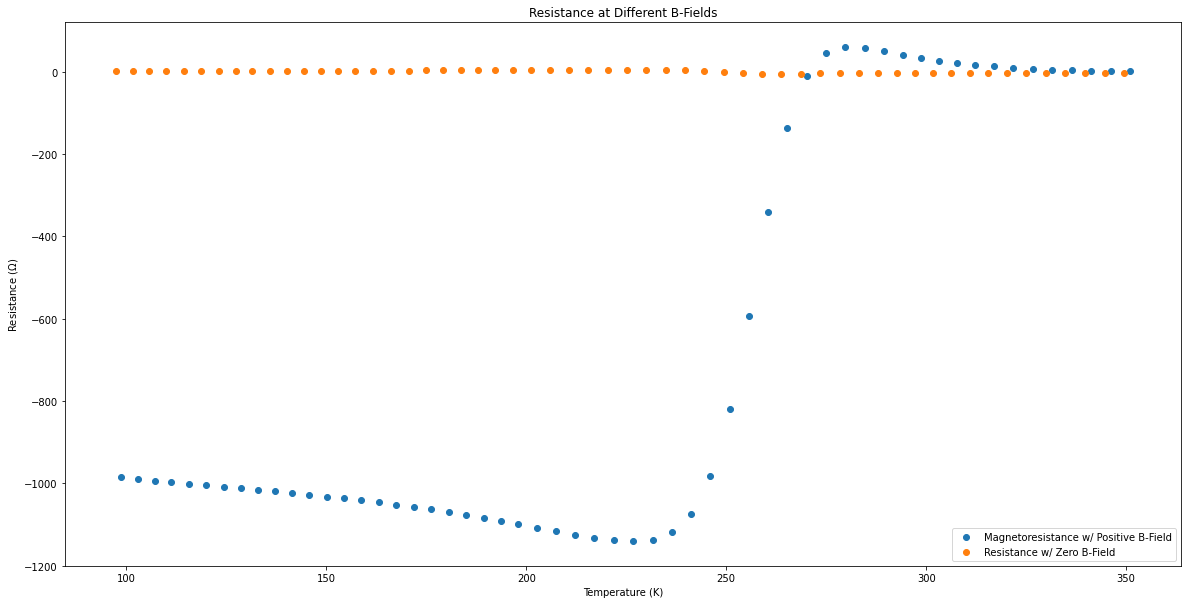

In [78]:
plt.figure(figsize=(20,10))
plt.scatter(tpos, trans_resistance_pos, label = 'Magnetoresistance w/ Positive B-Field')
plt.scatter(tzero, trans_resistance_zero, label = 'Resistance w/ Zero B-Field')
plt.legend(loc='lower right')
plt.ylabel(r'Resistance ($\Omega$)')
plt.xlabel(r'Temperature (K)')
plt.title(r'Resistance at Different B-Fields')
